# Ex2_bank_additional ------- Part 2

In [5]:
'''
Cho dữ liệu bank marketing data (tập tin bank-additional-full.csv) (UCI's Bank Marketing Data Set: link: https://archive.ics.uci.edu/ml/datasets/bank+marketing)
Dữ liệu có liên quan đến các chiến dịch tiếp thị trực tiếp (các cuộc gọi điện thoại) của một tổ chức ngân hàng Bồ Đào Nha. 
Mục tiêu phân loại là để dự đoán liệu khách hàng sẽ đăng ký một khoản tiền gửi có kỳ hạn hay không (y).

Yêu cầu:

Phần 2: Tính toán và trực quan hóa KPI, chủ yếu tập trung vào phântích conversion rates
1. Tạo cột conversion: dựa trên cột y với giá trị 'yes' => 1 và 'no' => 0
2. Tính toán tổng conversion và conversion rate
3. Tính toán conversion rate theo từng age. Trực quan hóa kết quả.
4. Tính toán conversion rate theo từng nhóm age (nhóm 18-30, nhóm 30-40, nhóm 40 - 50,nhóm 50-60, nhóm 60-70, nhóm >70. Trực quan hóa kết quả.
5. So sánh giữa conversion và non-conversion cho từng nhóm marital status. Trực quan hóa kết quả.
6. So sánh giữa conversion và non-conversion cho từng nhóm Age Groups & Marital Status.Trực quan hóa kết quả.
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy.stats as stats
import random

In [6]:
#read csv to dataframe
bank_full = pd.read_csv('data2/bank-additional-dataset/bank-additional-full.csv', sep=';')
bank_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# 1. Tạo cột conversion: dựa trên cột y với giá trị 'yes' => 1 và 'no' => 0

In [10]:
bank_full['conversion'] = bank_full['y'].apply(lambda x: 1 if x == 'yes' else 0)
bank_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


# 2. Tính toán tổng conversion và conversion rate

In [21]:
condition = bank_full['conversion'] == 1
conver_sum_1 = bank_full['conversion'][condition].sum() #'yes' is 1 and 'no' is 0, so the result of .sum() is exactly the number of 'yes' or '1' values
conver_rate_1 = conver_sum_1/bank_full.conversion.size
print("Conversion sum = 1 + 1 + .... ('yes' values) =", conver_sum_1)
print("Conversion rate = conversion sum / size =", conver_rate_1)

Conversion sum = 1 + 1 + .... ('yes' values) = 4640
Conversion rate = conversion sum / size = 0.11265417111780131


# 3. Tính toán conversion rate theo từng age. Trực quan hóa kết quả.

In [86]:
conver_by_age = bank_full['conversion'][condition].groupby(bank_full['age']).sum() / bank_full['conversion'].groupby(bank_full['age']).size()
print('Conversion rate by age:\n', conver_by_age)

Conversion rate by age:
 age
17    0.400000
18    0.428571
19    0.476190
20    0.353846
21    0.284314
        ...   
91         NaN
92    0.750000
94         NaN
95         NaN
98    1.000000
Name: conversion, Length: 78, dtype: float64


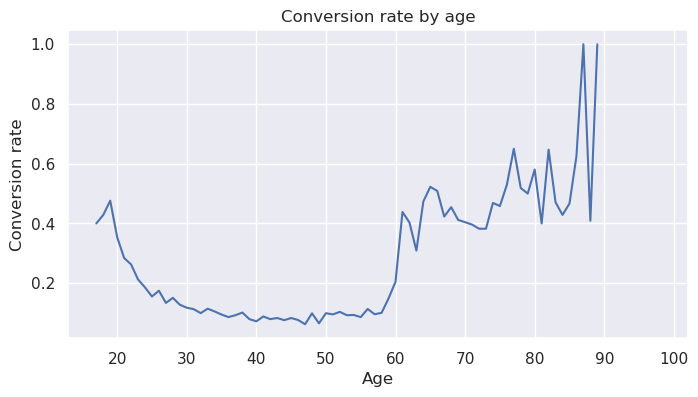

In [93]:
plt.figure(figsize=(8,4))
sbn.set_theme(style='darkgrid')
conver_by_age.plot(title='Conversion rate by age')
plt.xlabel('Age')
plt.ylabel('Conversion rate')
plt.show()

# 4. Tính toán conversion rate theo từng nhóm age (nhóm 18-30, nhóm 30-40, nhóm 40 - 50,nhóm 50-60, nhóm 60-70, nhóm >70. Trực quan hóa kết quả.

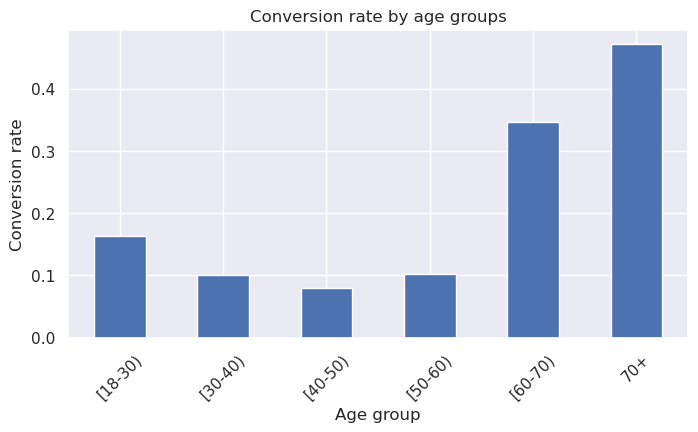

In [126]:
bank_full['age_group'] = bank_full['age'].apply(lambda x: "[18-30)" if x<30 \
                                                else "[30-40)" if x<40 \
                                               else "[40-50)" if x<50 \
                                               else "[50-60)" if x<60 \
                                               else "[60-70)" if x<70 \
                                               else "70+")

conver_by_age_group = bank_full['conversion'].groupby(bank_full['age_group']).sum() / bank_full['conversion'].groupby(bank_full['age_group']).size()

plt.figure(figsize=(8,4))
sbn.set_theme(style='darkgrid')

conver_by_age_group.loc[["[18-30)", "[30-40)", "[40-50)", "[50-60)", "[60-70)", "70+"]].plot.bar(title='Conversion rate by age groups') 
#Use .loc[["[18-30)", "[30-40)", "[40-50)", "[50-60)", "[60-70)", "70+"]] to make the plot shows age groups by wanted order

plt.xticks(rotation=45)
plt.xlabel('Age group')
plt.ylabel('Conversion rate')
plt.show()

# 5. So sánh giữa conversion và non-conversion cho từng nhóm marital status. Trực quan hóa kết quả.

In [157]:
bank_full.groupby(['marital','y'])['conversion'].size()

marital   y  
divorced  no      4136
          yes      476
married   no     22396
          yes     2532
single    no      9948
          yes     1620
unknown   no        68
          yes       12
Name: conversion, dtype: int64

In [151]:
conver_marital_yn = pd.pivot_table(data=bank_full,
                                  values='y', #choose the column to apply aggregate function
                                  index='marital',
                                   columns='conversion',
                                  aggfunc=len) #define aggreagate function to apply
conver_marital_yn

conversion,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [155]:
conver_marital_yn.columns = ['non_conversion','conversion']
conver_marital_yn

,non_conversion,conversion
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


array([<Axes: ylabel='non_conversion'>, <Axes: ylabel='conversion'>],
      dtype=object)

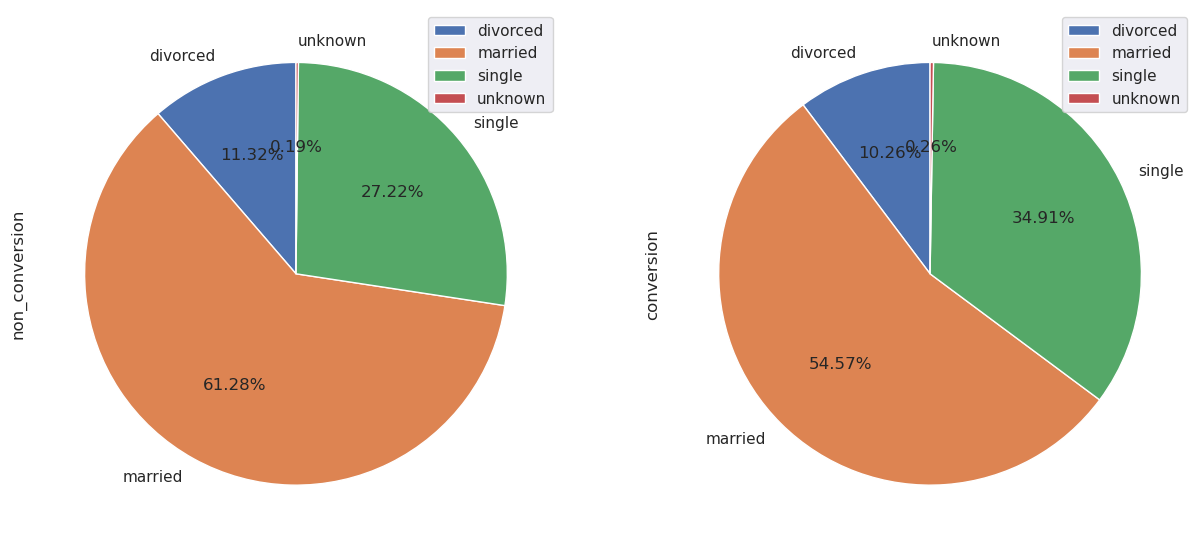

In [181]:
conver_marital_yn.plot(kind='pie', subplots=True, figsize=(15,8), startangle=90, autopct=lambda x: f'{round(x,2)}%')

# 6. So sánh giữa conversion và non-conversion cho từng nhóm Age Groups & Marital Status.Trực quan hóa kết quả.

In [328]:
bank_full.groupby(['marital','age_group'])['conversion'].sum()

marital   age_group
divorced  70+           64
          [18-30)       12
          [30-40)      128
          [40-50)      126
          [50-60)      119
          [60-70)       27
married   70+          151
          [18-30)      158
          [30-40)      897
          [40-50)      575
          [50-60)      533
          [60-70)      218
single    70+            6
          [18-30)      751
          [30-40)      684
          [40-50)      130
          [50-60)       44
          [60-70)        5
unknown   [18-30)        1
          [30-40)        6
          [40-50)        3
          [50-60)        1
          [60-70)        1
Name: conversion, dtype: int64

In [332]:
sum_marital_agegroup = bank_full.groupby(['marital','age_group'])['conversion'].sum().unstack('marital') #unstack() to create 2x2 table
#another way different from pd.pivotatl
sum_marital_agegroup

marital,divorced,married,single,unknown
age_group,,,,
70+,64.0,151.0,6.0,NaN
[18-30),12.0,158.0,751.0,1.0
[30-40),128.0,897.0,684.0,6.0
[40-50),126.0,575.0,130.0,3.0
[50-60),119.0,533.0,44.0,1.0
[60-70),27.0,218.0,5.0,1.0


In [334]:
sum_marital_agegroup['unknown'] = sum_marital_agegroup['unknown'].fillna(np.nanmedian(sum_marital_agegroup['unknown'])) #fill missing value
                                                                        #np.nanmedian() calculate median along an axis ignoring the nan values

sum_marital_agegroup

marital,divorced,married,single,unknown
age_group,,,,
70+,64.0,151.0,6.0,1.0
[18-30),12.0,158.0,751.0,1.0
[30-40),128.0,897.0,684.0,6.0
[40-50),126.0,575.0,130.0,3.0
[50-60),119.0,533.0,44.0,1.0
[60-70),27.0,218.0,5.0,1.0


In [336]:
bank_full.groupby('age_group')['conversion'].count() #full size of all 'yes' 'no' values

age_group
70+          469
[18-30)     5669
[30-40)    16938
[40-50)    10526
[50-60)     6862
[60-70)      724
Name: conversion, dtype: int64

In [338]:
conver_marital_agegroup = sum_marital_agegroup.divide(bank_full.groupby('age_group')['conversion'].count(), axis=0) *100
#Use .divide() method to set axis = 0, so as to divide the sum for the size(count) along the column

conver_marital_agegroup

marital,divorced,married,single,unknown
age_group,,,,
70+,13.646055,32.196162,1.279318,0.213220
[18-30),0.211678,2.787088,13.247486,0.017640
[30-40),0.755697,5.295785,4.038257,0.035423
[40-50),1.197036,5.462664,1.235037,0.028501
[50-60),1.734188,7.767415,0.641212,0.014573
[60-70),3.729282,30.110497,0.690608,0.138122


Text(0, 0.5, 'Conversion rate %')

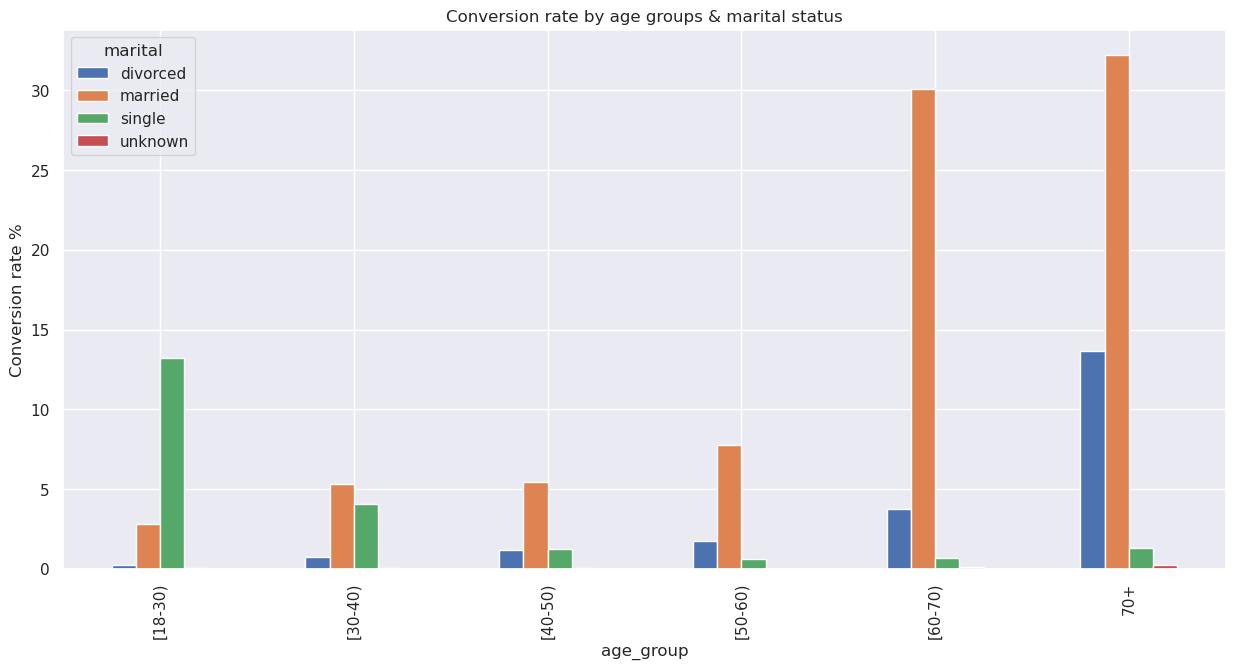

In [340]:
conver_marital_agegroup.loc[["[18-30)", "[30-40)", "[40-50)", "[50-60)", "[60-70)", "70+"]].plot.bar(title='Conversion rate by age groups & marital status', 
                                                                                                     figsize=(15,7))
plt.ylabel('Conversion rate %')